Group Project Proposal

Title:  Classification using Dry Bean Data Set of 7 Bean Types

Introduction:

We will be working with the Dry Bean Dataset from the University of Irvine. This dataset contains information on 7 different Dry beans (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira). Images of 13,611 beans were taken by a high-resolution camera. Based on these images, data was recorded for 16 variables/features such as area, perimeter, aspect ratio, etc. The question we would like to answer is: can we classify/predict an unknown bean type into one of the 7 classes of dry beans?

To answer this question, we will be using the two variables: minor axis length and roundness. The definitions for these relevant terms and abbreviations are described as "the longest line that can be drawn from the bean while standing perpendicular to the main axis" and the value calculated "using the following formula (4piA)/(P^2)" for minor axis length and roundness respectively (UC Irvine, 2020). The units are in pixels.

(A = area, P = perimeter)

Preliminary exploratory data analysis:

In [3]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(readxl)
library(gridExtra)
library(RColorBrewer)
require(gridExtra)
options(repr.matrix.max..rows = 6)
set.seed(99999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [6]:

url <- "https://github.com/Adrianna-Nimmons/dsci-100-project-group51/raw/main/beans.xlsx"
download.file(url, "beans.xlsx")
beans_data <- read_excel("beans.xlsx")
beans_data <- mutate(beans_data, Class = as_factor(Class))

beans_split <- initial_split(beans_data, prop = 0.75, strata = Class)
beans_training <- training(beans_split)
beans_testing <- testing(beans_split) 

new_table_1<- beans_training |>
            group_by(Class)|>
            # summarize(count=n())
             summarize(Mean_Minor_Axis_Length = mean(MinorAxisLength), Mean_Roundness = mean(roundness), count=n())
new_table_1


Class,Mean_Minor_Axis_Length,Mean_Roundness,count
<fct>,<dbl>,<dbl>,<int>
SEKER,201.8753,0.9451651,1513
BARBUNYA,240.0588,0.7996540,997
BOMBAY,374.1663,0.8634160,397
CALI,236.4282,0.8461796,1217
HOROZ,183.8771,0.7947294,1451
SIRA,190.9759,0.8852522,1980
DERMASON,165.7484,0.9078511,2651


MinorAxisLength,roundness,Class
<dbl>,<dbl>,<fct>
0.01599551,-1.17704483,BARBUNYA
-0.09052819,0.27176787,BARBUNYA
0.26262256,-0.52418000,BARBUNYA
0.03552058,-0.85220724,BARBUNYA
0.05144850,-1.42318542,BARBUNYA
0.09843241,-0.80848535,BARBUNYA
0.18745815,0.31702917,BARBUNYA
-0.15041945,-1.48642582,BARBUNYA
0.06731562,-1.21895153,BARBUNYA


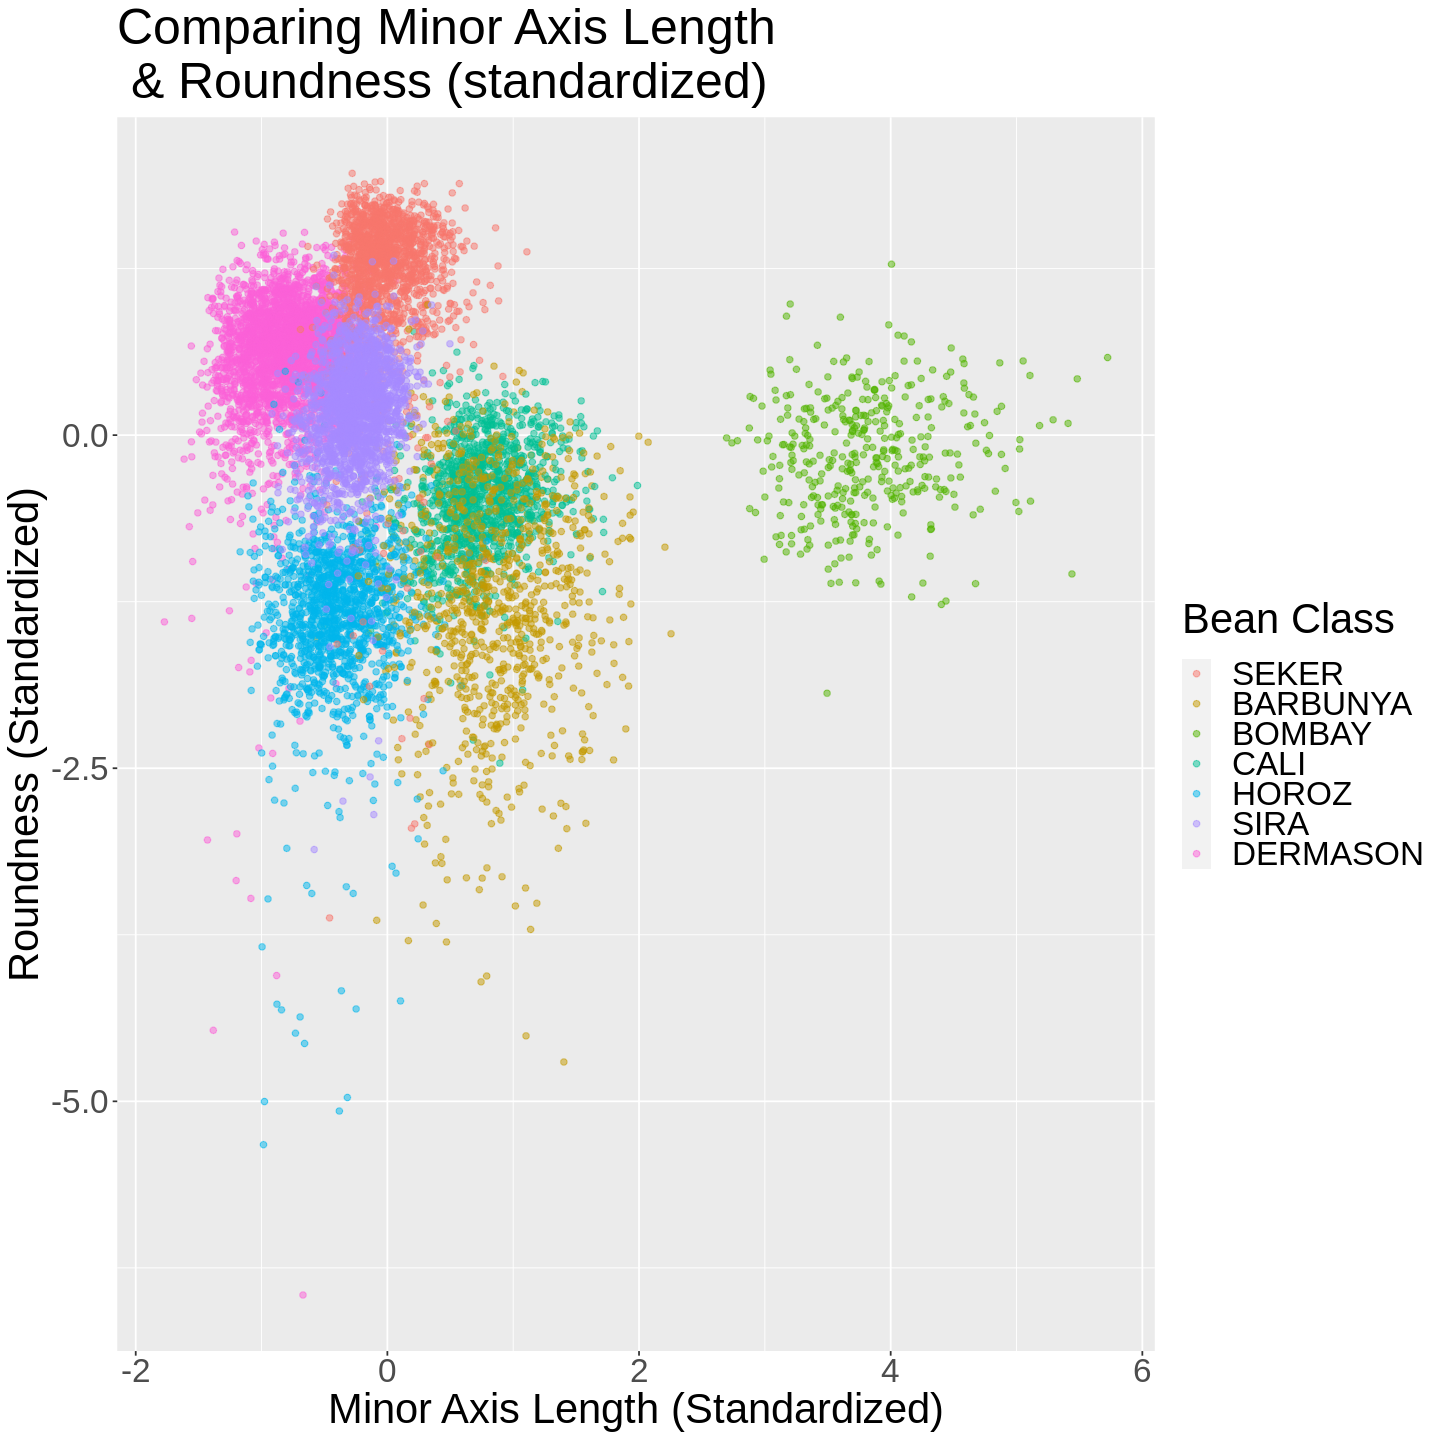

In [5]:

scaled_beans_training_recipe <- recipe(Class ~ MinorAxisLength + roundness, data = beans_training) |>
                      step_scale(all_predictors()) |>
                     step_center(all_predictors())

scaled_beans_training <- scaled_beans_training_recipe |>  
                           prep() |> 
                           bake(beans_training)


scaled_beans_training

beans_shape_factor_plot <- ggplot(scaled_beans_training, aes(x = MinorAxisLength, y = roundness, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Minor Axis Length (Standardized)", y = "Roundness (Standardized)", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Roundness (standardized)") +
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 12, repr.plot.height = 12)

beans_shape_factor_plot
   


    Methods:

According to the article written by Khan et.al in 2023, the most important features in classifying the class of the dry bean were the following: ShapeFactor2, ShapeFactor1, Minor Axis Length, EquivDiameter, Roundness and ConvexArea (Khan et.al, 2023). Therefore, we narrowed down our predictors to these 6 variables.

To narrow it down even further we experimentally plotted the 6 variables against each other in various scatter plots (not shown). The scatter plot produced from roundness and minor axis length above showed a distinct difference between the 7 classes when using the colour function. Therefore, we decided to use the following columns/predictors: minor axis length and roundness to create a scatter plot.

The scatter plot shown above shows the relationship between minor axis length and roundness, allowing the visualization of how different classes of beans have different measurements when taking in these two features  together. This allows them to be distinctly classified by 7 different colours.





     Expected outcomes and significance:

We expect that the difference in variables obtained from the images will be significant enough such that classification between different types of bean class would be possible. Therefore, classification of an unknown bean should be possible using our finished produced model.

These findings may be useful for people who work in agriculture and food manufacturing/quality assurance companies who work with beans. Making sure that the beans are consistent in shape is essential for food quality assurance practices in obtaining quality products. Moreover, with computer imagery, inspection of beans would require less human labour and error. Manually categorizing beans by hand can also be challenging and time consuming. 

Further questions we have are:

1. What bean types are most similar or different to one another - could this data be used to analyze evolutionary relationships?

2. What beans are the most common/widely produced? Would this have effects on the pricing of different classes of beans?


